# Backtesting

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [2]:
df = pd.read_csv(Path('df_8_30_2020.csv'))
df.set_index('Date',inplace = True)
df.tail()

,BTCUSDT,EOSUSDT,ETHUSDT,LINKUSDT,LTCUSDT
Date,,,,,
8/30/2020 23:24,11707.26,3.2443,429.48,16.6062,62.76
8/30/2020 23:25,11709.59,3.2431,429.32,16.5777,62.79
8/30/2020 23:26,11706.45,3.2393,428.99,16.5446,62.78
8/30/2020 23:27,11702.11,3.2379,428.30,16.5507,62.73
8/30/2020 23:28,11699.99,3.2376,NaN,NaN,62.72


In [3]:
independent = 'EOSUSDT'
dependent = 'LTCUSDT'

#def generate_signals(df,independent,dependent,multiplier,f_sample):
df = df.pct_change()
df = df.dropna()
df_insample = pd.DataFrame()
residuals2_mean = []
residuals2_std = []
f_sample = 2500 #delete this one set upas function
result = []
residuals2_list = []

In [4]:
for n in range(f_sample): #f_sample is the out-of-sample data
    df_insample = df.iloc[0 : len(df) - f_sample + n]
    df_insample.tail()

    X = df_insample[independent].values.reshape(-1, 1)
    y = df_insample[dependent]
    model = LinearRegression()
    model.fit(X, y)
    predicted_y_values = model.predict(X)
    residuals = df_insample.loc[:,'LTCUSDT'] - predicted_y_values
    model_AR = ARMA(residuals.values, order = (1,0))
    results = model_AR.fit()
    a = results.params[0]
    b = results.params[1]
    kappa = -np.log((abs(b)))
    m = a / (1 - np.exp(-kappa))
    residuals_shifted = residuals.shift()
    residuals2 = residuals - (a + b*residuals_shifted)
    residuals2_list.append(residuals2[-1])
    sigma_epsilon = residuals2.std()
    df_results = pd.DataFrame()
    multiplier = 1 # delete for function
    
    if residuals2[-1] > multiplier*sigma_epsilon:
        result.append(-1.0)
        
    elif residuals2[-1] < -multiplier*sigma_epsilon:
        result.append(1.0)
        
    else:
        result.append(0.0)
        

C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [5]:
counter = 0
for i in range(len(result)):
    if float(result[i]) != 0.0:
        counter += 1
counter        

767

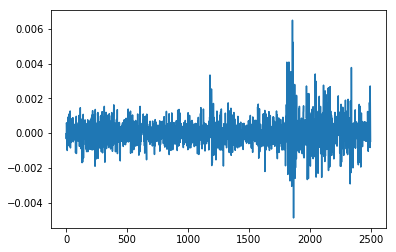

In [6]:
plt.plot(residuals2_list)

In [7]:
sigma_epsilon

0.0007188589407376994

In [8]:
df_outsample = df.tail(f_sample)

In [9]:
pnl = []
btc_signal = 0.0
eth_signal = 0.0
for i in range(len(result)):
    
    pnl.append(df_outsample.iloc[i,0]*btc_signal + df_outsample.iloc[i,2]*eth_signal)
    
    if float(result[i]) == -1.0:
        btc_signal = 1.0
        eth_signal = -1.0
    elif float(result[i]) == 1.0:     
        btc_signal = -1.0
        eth_signal = 1.0 
    else:
        btc_signal = 0.0
        eth_signal = 0.0

In [17]:
sum(pnl)*1000000

-1765.729052209064

In [11]:
max(pnl)

0.0024877578830864167

In [12]:
min(pnl)

-0.0032015236686653292

In [13]:
p_count = 0
n_count = 0
for n in range(len(pnl)):
    if pnl[n] > 0:
        p_count += 1
    elif pnl[n] < 0:
        n_count +=1

In [14]:
p_count

399

In [15]:
n_count

368

In [16]:
pnl

[0.0,
 0.0,
 -0.0,
 0.0,
 -0.0006265668584390927,
 0.0,
 -0.0,
 -0.0,
 0.0004765323777409236,
 0.00026029344688860423,
 -0.0003756427854544331,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0002524551261011698,
 -0.0004172693274349104,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.00012198004241281701,
 0.0,
 0.0,
 0.0009715587787286761,
 0.0,
 -0.0010278596260913098,
 0.0,
 0.0,
 0.0003975350734153338,
 -0.0,
 0.0,
 0.0007232289439672579,
 0.0008748322167542177,
 0.0017834513211907321,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.00011597616254521714,
 -0.0,
 -0.0,
 0.0004303553281289618,
 -0.0,
 -0.0,
 -0.0,
 -0.0003368124857457966,
 -0.0,
 -0.0007349605515052371,
 0.0,
 -0.0,
 -0.0,
 -0.000422002818084799,
 0.0,
 -0.0010407217629817556,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 9.192582976402797e-05,
 -0.0007216904554030457,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0005325154230377827,
 8.471389138486884e-05,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0